In [1]:
"""
Purpose: To visualize the scores of different neurons
and figure out how we can improve the version 3 process
before the big run


"""

'\nPurpose: To visualize the scores of different neurons\nand figure out how we can improve the version 3 process\nbefore the big run\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [4]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-02-26 16:47:55,451 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-26 16:47:55,453 - settings - Setting database.user to celiib
INFO - 2021-02-26 16:47:55,454 - settings - Setting database.password to newceliipass
INFO - 2021-02-26 16:47:55,466 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-02-26 16:47:55,468 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-26 16:47:55,484 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-02-26 16:47:55,868 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-26 16:47:55,902 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-26 16:47:56,318 - settings - Setting enable_python_native_blobs to True


In [5]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru
import validation_utils as vu
import pandas as pd

INFO - 2021-02-26 16:48:35,834 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-26 16:48:36,312 - settings - Setting enable_python_native_blobs to True


In [6]:
import validation_utils as vu

# Getting the Validation Statistics

In [28]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False) for k in segment_ids]

Synapsse Results:
Total Number of Synapses = 3990
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 29
n_valid_syn_ids_postsyn = 3891
n_errored_syn_ids_postsyn = 65
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 73
n_errored_syn_ids_presyn = 448
n_valid_syn_ids_postsyn = 3899
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 923
n_valid_syn_ids_presyn = 13
n_errored_syn_ids_presyn = 153
n_valid_syn_ids_postsyn = 753
n_errored_syn_ids_postsyn = 4
Synapsse Results:
Total Number of Synapses = 4361
n_valid_syn_ids_presyn = 87
n_errored_syn_ids_presyn = 620
n_valid_syn_ids_postsyn = 3649
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 3452
n_valid_syn_ids_presyn = 76
n_errored_syn_ids_presyn = 345
n_valid_syn_ids_postsyn = 3007
n_errored_syn_ids_postsyn = 24
Synapsse Results:
Total Number of Synapses = 3190
n_valid_syn_ids_presyn = 18
n_errored_syn_ids_presyn = 89
n_valid_syn_ids_postsyn = 3081
n_errored_sy

Synapsse Results:
Total Number of Synapses = 1645
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 108
n_valid_syn_ids_postsyn = 1536
n_errored_syn_ids_postsyn = 1
Synapsse Results:
Total Number of Synapses = 4633
n_valid_syn_ids_presyn = 72
n_errored_syn_ids_presyn = 219
n_valid_syn_ids_postsyn = 4328
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 2383
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 47
n_valid_syn_ids_postsyn = 2334
n_errored_syn_ids_postsyn = 2
Synapsse Results:
Total Number of Synapses = 4015
n_valid_syn_ids_presyn = 12
n_errored_syn_ids_presyn = 109
n_valid_syn_ids_postsyn = 3879
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 1914
n_valid_syn_ids_presyn = 3
n_errored_syn_ids_presyn = 212
n_valid_syn_ids_postsyn = 1528
n_errored_syn_ids_postsyn = 171
Synapsse Results:
Total Number of Synapses = 10012
n_valid_syn_ids_presyn = 8
n_errored_syn_ids_presyn = 164
n_valid_syn_ids_postsyn = 9825
n_errored_

# Develop the Visualizations for the FP, FN, Tp, TN visualization function

In [156]:
curr_validation_df = validation_dfs[6]

In [157]:
du.plot_proofread_validation_neuron(
    #segment_id = 864691136370815112,
    validation_df=curr_validation_df,
    verbose = True,
    synapse_type = "presyn",
)

Working on Neuron: 864691135212632448


Synapse Category Results, synapse_type = presyn
# of TP = 10
# of TN = 371
# of FP = 29
# of FN = 3


TP:yellow
TN:aqua
FP:black
FN:orange


# Trying the new crossover resolve method

In [158]:
segment_id = vu.validation_df_to_old_segment_id(curr_validation_df)
segment_id

864691135212632448

In [159]:
"""
Pseudocode: 

"""

neuron_objs,neuron_split_idxs = du.decomposition_with_spine_recalculation(segment_id)

Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
Number of Neurons found = 1


In [160]:
neuron_obj = neuron_objs[0]
neuron_obj.segment_id

864691135212632448

In [161]:
clu.axon_classification(neuron_obj)


Part 1: Axon like branchese 
{'L0': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 51]), 'L1': array([5]), 'L2': array([11]), 'L4': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55]), 'L5': array([ 1,  2,  3,  4,  5,  7,  8, 10, 11]), 'L6': array([ 8, 13])}
Limb L0 soma angle: 73.36 
Limb L1 soma angle: 39.44 
Limb L2 soma angle: 101.61 
Limb L3 soma angle: 111.28 
Limb L4 soma angle: 161.23 
Limb L5 soma angle: 25.74 
Limb L6 soma angle: 123.13 

Part 2: possible_axon_limbs = [0, 2, 3, 4, 6]

Phase 2: Working on Limb L0
nodes_to_eliminate = [45]

Phase 2: Working on Limb L2
nodes_to_eliminate = [0 2 3]

Phase 2: Working on Limb L3
nodes_to_el

({'L4': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
         13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
         26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
         39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
         52., 53., 54., 55.])},
 {'L0': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
         18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 41, 42, 43, 44, 51]),
  'L2': array([11]),
  'L5': array([ 1,  2,  3,  4,  5,  7,  8, 10, 11]),
  'L6': array([ 8, 13])})

In [162]:
import proofreading_utils as pru
o_neuron,filter_dict = pru.proofread_neuron_class_predetermined(neuron_obj,
    perform_axon_classification=False,
    inh_exc_class="excitatory",
    plot_limb_branch_filter_with_disconnect_effect = True,

    high_fidelity_axon_on_excitatory = True,
    plot_final_filtered_neuron = False,

    #arguments for the axon high fidelity:
    plot_new_axon_limb_correspondence = True,
    plot_new_limb_object = False,
    plot_final_revised_axon_branch = False,

    verbose = False,
    verbose_outline = True)



 Using high_fidelity_axon_on_excitatory


---Step 1: Applying Dendrite on Axon Filtering

--- Working on filter 0:
function = dendrite_on_axon_merges
function __name__ = filter_away_dendrite_on_axon_merges
function arguments = {'use_pre_existing_axon_labels': True}





 ---- Total time for applying filter: 0.28113293647766113 -----


---- Step 2: Applying High Fidelity Axon -----
Starting axon branch was the starting node so using border vertices and NOT computing upstream branch
upstream_node_to_axon_starting_branch = None


  0%|          | 0/1 [00:00<?, ?it/s]

root_curr = [742948.9 748461.6 851662. ]
Time for preparing soma vertices and root: 0.010429620742797852
invalidation_d = 1600
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:03<00:00,  3.02s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 3.8701322078704834
branches_touching_root = [8]
combining close nodes
combine_threshold = 1300
length of Graph = 20473
After combining close endpoints max(kept_branches_idx) = 201, len(kept_branches_idx) = 181
empty_indices % = 0.0
 conflict_indices % = 0.025595750252515807



AFTER face_lookup_resolved_test



Decomposing first pass: 13.72525954246521
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.9087066650390625e-05
Total time for MAP sublimb processing 4.0531158447265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 0.0013260841369628906
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.0035572052001953125
sbv[0].reshape(-1,3) = [[742948.9 748461.6 851662. ]]
closest_sk_pt_coord BEFORE = [743736.61306778 748915.07115218 852209.08372999]
current_skeleton.shape = (31, 2, 3)
node_for_stitch = 11: [743736.61306778 748915.07115218 852209.08372999]
node_for_stitch AFTER = 11: [743736.61306778 748915.07115218 852209.08372999]
possible_node_loc = [ 0 27 31]
possible_node_loc AFTER = [ 0 27 31]
curr_shortest_path = [11, 27.0]
Current stitch point was not a branch or endpoint, shortest_


Removed 20 skeletal branches



134061 134062
For marked faces: None
empty_indices % = 0.0045277558144739
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Upstream node was None so don't have to adjust
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7f9019cb5f60>]}
Assigning the old width calculation because no valid new widths


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [744024.36641074 748803.15095914 852504.75916707]---------
Starting_edge inside branches_to_conept = [[743736.61306778 748915.07115218 852209.08372999]
 [744024.36641074 748803.15095914 852504.75916707]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [62]
printing out current edge:
[[744024.36641074 748803.15095914 852504.75916707]
 [743736.61306778 748915.07115218 852209.08372999]]
edge_endpoints_to_process was empty so exiting loop after 146 iterations
starting_node in concept map (that should match the starting edge) = 71
Total time for branches to concept conversion = 1.021984577178955

Done generating concept network 




---- Step 3: 


--- Working on filter 1:
function = crossovers
function __name__ = filter_away_crossovers
function arguments = {'axon_dependent': True, 'match_threshold': 50, 'require_two_pairs': False}


Using lowest_angle_sum_for_pairs optimization
Using lowest_angle_sum_for_pairs optimization
Using lowest_angle_sum_for_pairs optimization
Using lowest_angle_sum_for_pairs optimization
Using lowest_angle_sum_for_pairs optimization
Using lowest_angle_sum_for_pairs optimization
Using lowest_angle_sum_for_pairs optimization
Using lowest_angle_sum_for_pairs optimization
Using lowest_angle_sum_for_pairs optimization
Using lowest_angle_sum_for_pairs optimization
Using lowest_angle_sum_for_pairs optimization


Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 2:
function = low_branch_clusters
function __name__ = filter_away_low_branch_length_clusters
function arguments = {}



--- Working on filter 3:
function = double_back_and_width_change
function __name__ = filter_away_large_double_back_or_width_changes
function arguments = {'perform_double_back_errors': True, 'skip_double_back_errors_for_axon': False, 'width_jump_threshold': 250, 'running_width_jump_method': True, 'double_back_axon_like_threshold': 145, 'double_back_threshold': 120}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 4:
function = high_degree_coordinates
function __name__ = filter_away_high_degree_coordinates
function arguments = {'axon_dependent': True, 'min_degree_to_find': 4}


min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4



 ---- Total time for applying filter: 95.89033198356628 -----


In [163]:
nviz.visualize_neuron(o_neuron,
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


[[],
 [[1, 'a']],
 [[2, 'b']],
 [[1, 'a'], [2, 'b']],
 [[3, 'c']],
 [[1, 'a'], [3, 'c']],
 [[2, 'b'], [3, 'c']],
 [[1, 'a'], [2, 'b'], [3, 'c']]]

In [125]:
matched_branches = list(return_info[0])
match_branches_angle = list(return_info[1])
matched_branches,match_branches_angle



In [117]:


return_info = xu.degree_1_max_edge_min_max_weight_graph(
    G = G,
    verbose = False,
    plot_winning_graph = False,
return_edge_info=True)

return_info

#xu.get_edges_with_weights(ret_G)

(array([[1, 2],
        [4, 5]]),
 array([10,  1]))

N_edges for winning graph = 2


(array([[1, 4],
        [3, 2]]),
 array([20, 40]))

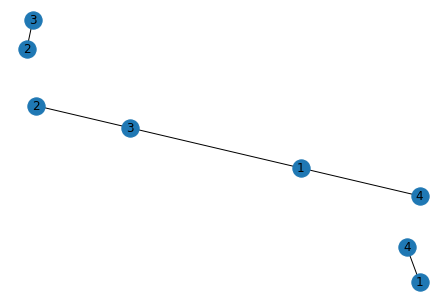

In [50]:
import networkx as nx

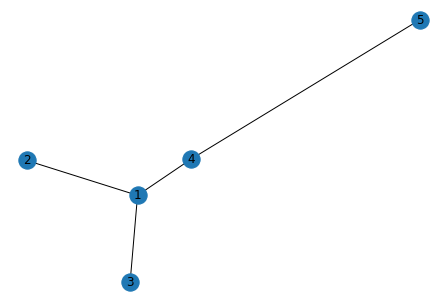

In [70]:
G = nx.Graph()
G.add_weighted_edges_from([[1,2,10],[1,3,20],[1,4,50],[4,5,1]])
nx.draw(G,with_labels=True)

In [73]:
xu.sum_of_edge_weights(G)

81.0

In [78]:
xu.max_node_degree(G)

3

In [56]:
import networkx_utils as xu
xu.all_subgraph_edges(G)

[[],
 [(1, 2)],
 [(1, 3)],
 [(1, 2), (1, 3)],
 [(1, 4)],
 [(1, 2), (1, 4)],
 [(1, 3), (1, 4)],
 [(1, 2), (1, 3), (1, 4)],
 [(4, 5)],
 [(1, 2), (4, 5)],
 [(1, 3), (4, 5)],
 [(1, 2), (1, 3), (4, 5)],
 [(1, 4), (4, 5)],
 [(1, 2), (1, 4), (4, 5)],
 [(1, 3), (1, 4), (4, 5)],
 [(1, 2), (1, 3), (1, 4), (4, 5)]]

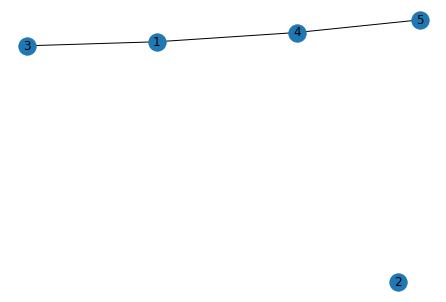

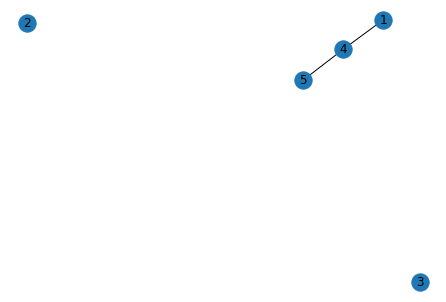

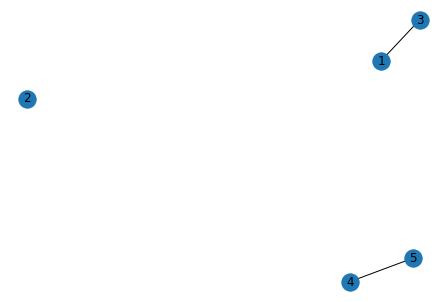

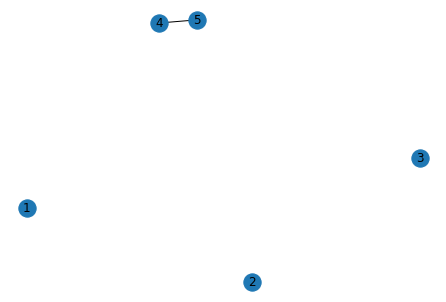

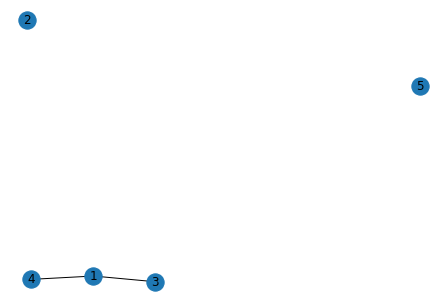

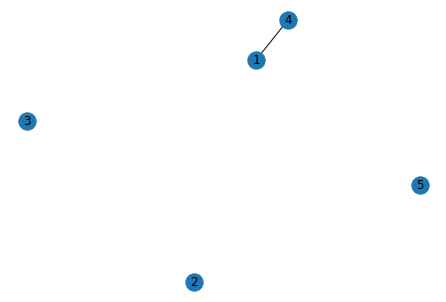

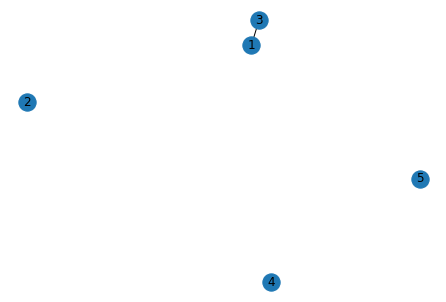

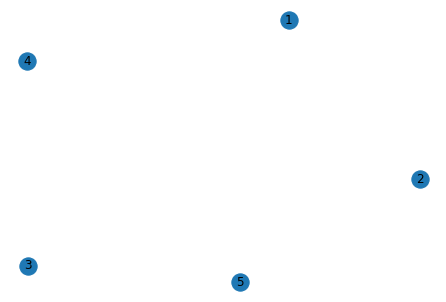

In [71]:
G.score()

AttributeError: 'Graph' object has no attribute 'score'